In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

edges = pd.read_csv('data/graph_mix.csv')
edges.head(1)

,FID_x,FID_y,TOTAL_D,Rang,LONGITUD
0,0,1,65,15,42.615


In [2]:
max(edges.FID_y)

9465

In [3]:
node_features = []
for node in range(max(edges.FID_y)+1):
    result = edges[(edges['FID_x'] == node) | (edges['FID_y'] == node)].Rang
    if len(result)>0:
        node_features.append([node, sum(result)/len(result) ])
   # else: 
       # node_features.append([node, 0])
        #print(node)

In [4]:
node_features_pd = pd.DataFrame(node_features, columns=['nodes', 'features'])

In [5]:
len(node_features_pd)

9389

In [6]:
G = nx.Graph()

for i, node in node_features_pd.iterrows():
    G.add_node(node['nodes'], feature=node['features'])

for i, edge in edges.iterrows():
    G.add_edge(edge['FID_x'], edge['FID_y'])


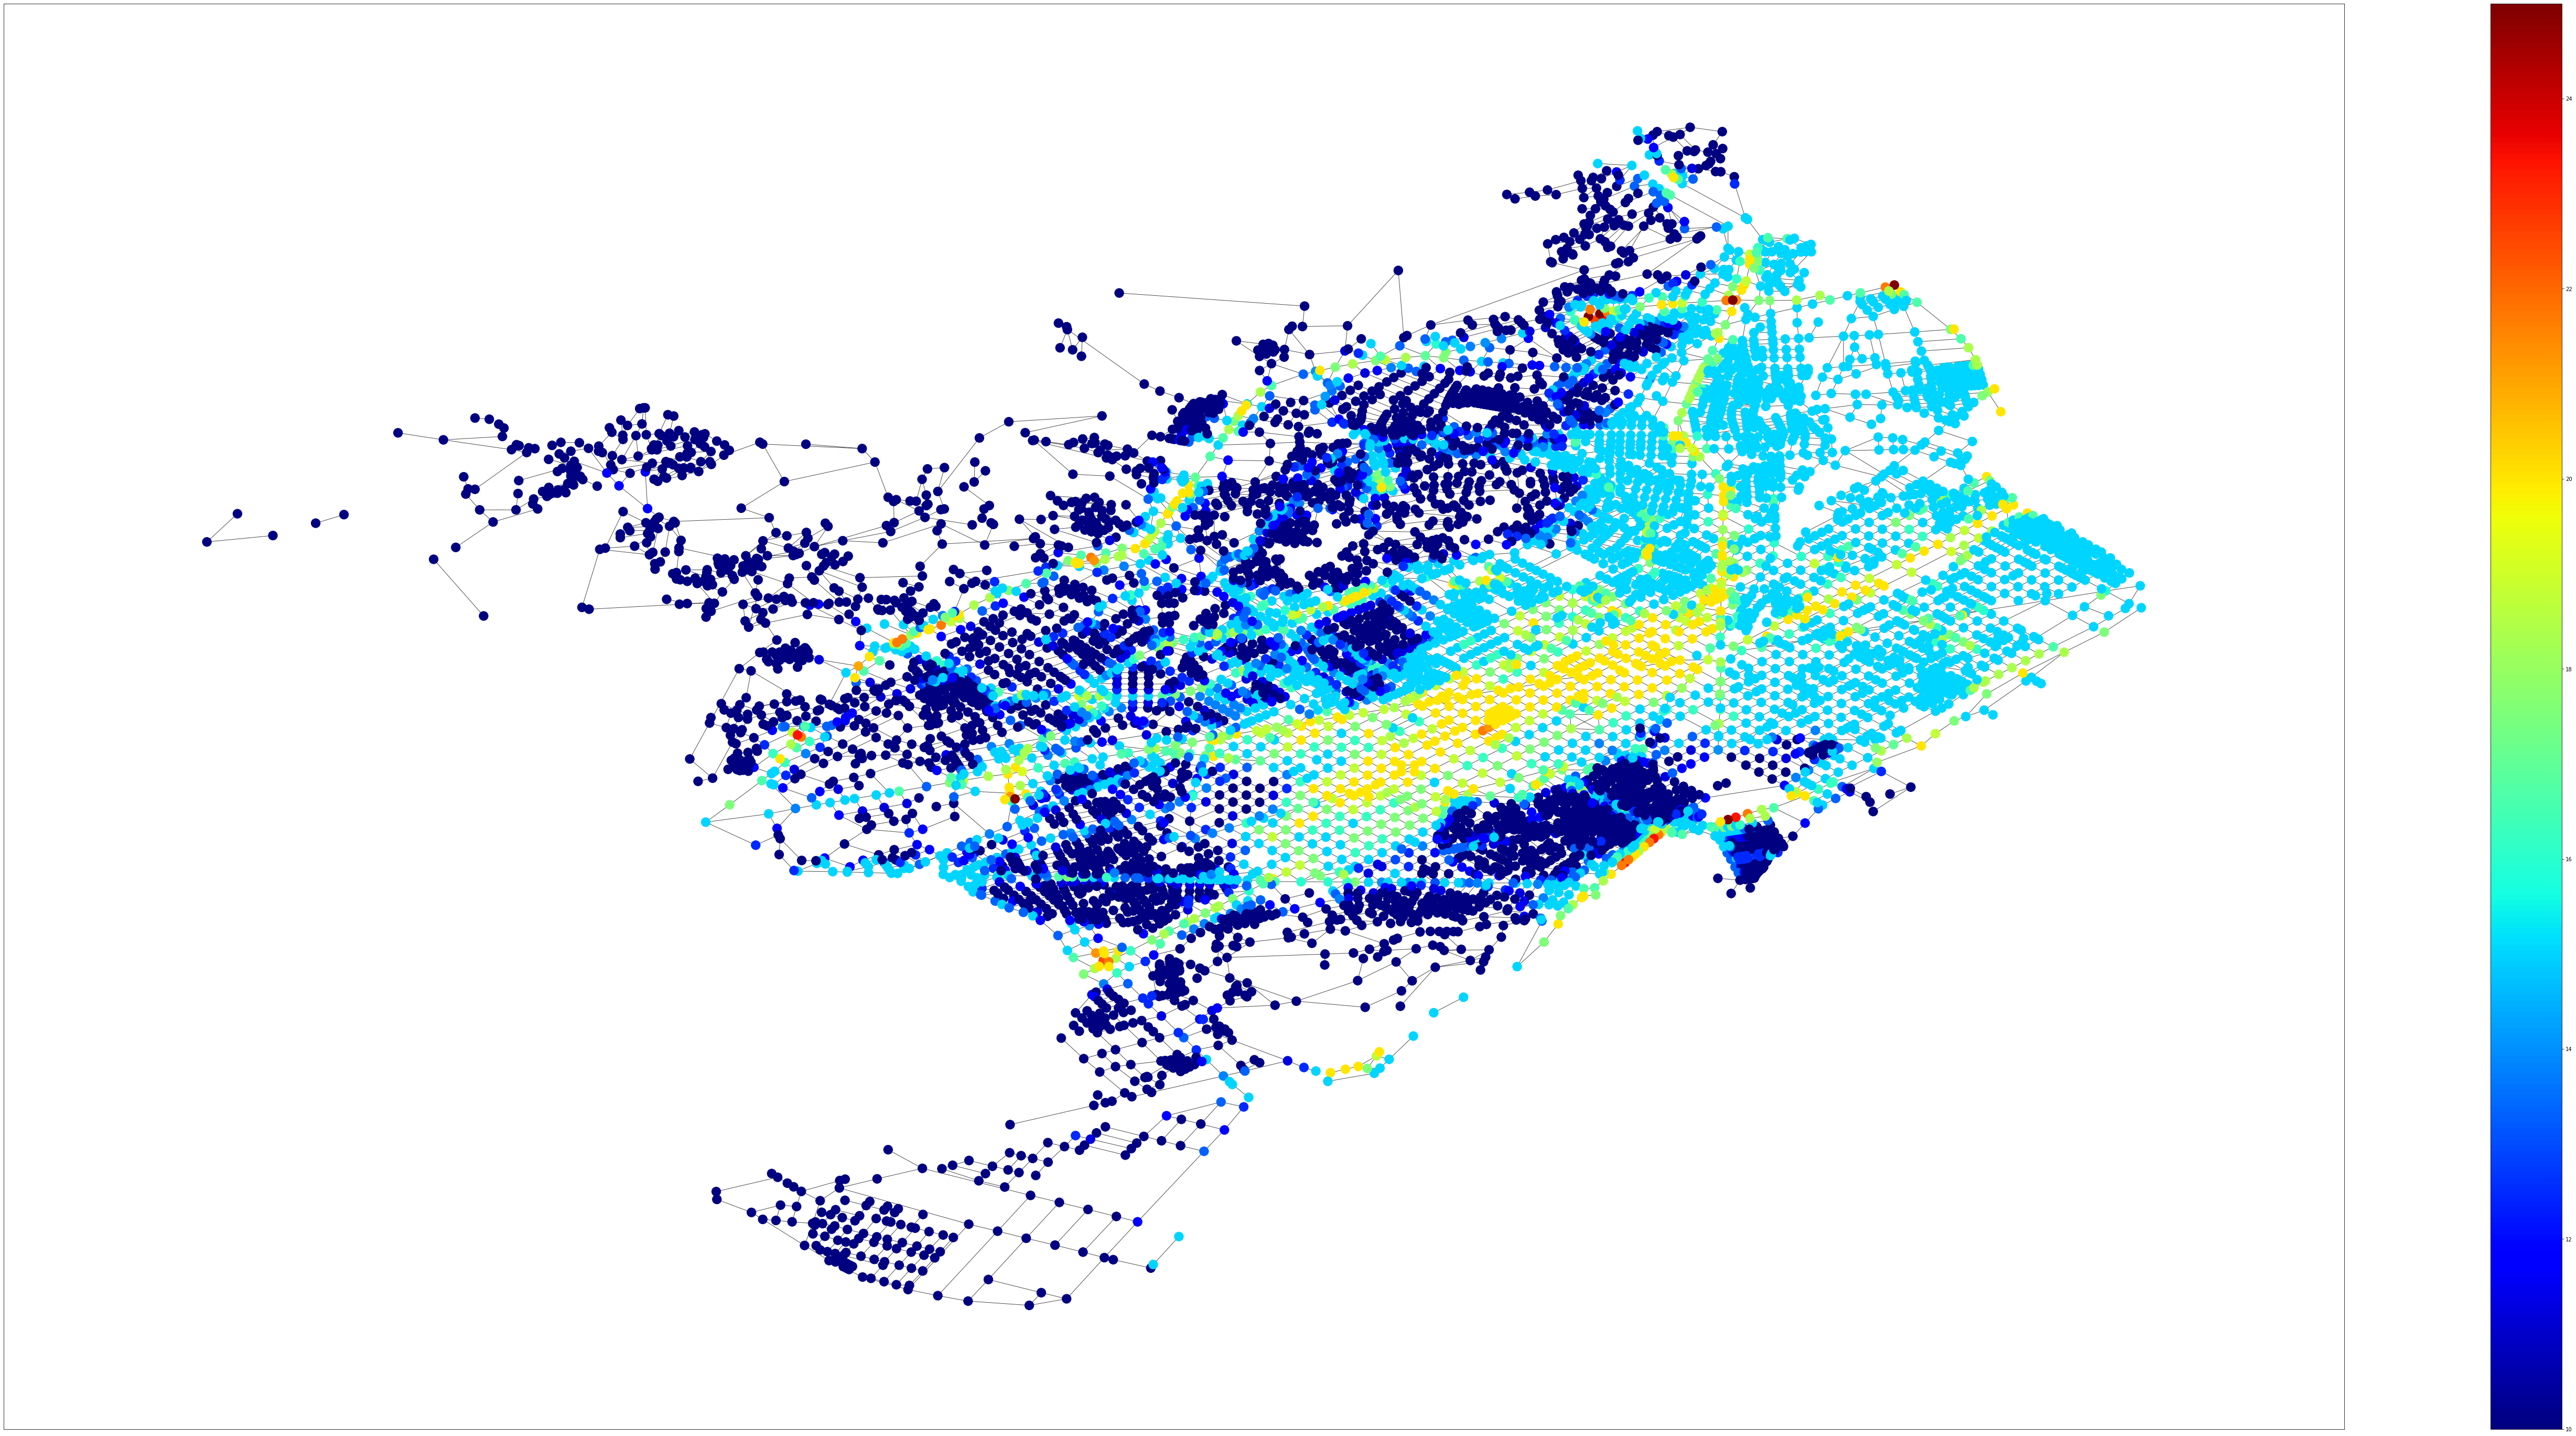

In [16]:
import pickle
with open('positions.pkl', 'rb') as f:
    positions = pickle.load(f)

plt.figure(figsize=[100,50])
ec = nx.draw_networkx_edges(G, pos=positions, alpha=0.7)
nc = nx.draw_networkx_nodes(G, pos=positions, node_color=node_features_pd.features, cmap=plt.cm.jet)
plt.colorbar(nc)
plt.show()

## Comparación datos en la web openBCN

![title](data/Screenshot-graph-BCN.png)

## De Networkx a DGL


In [23]:
import dgl
G_dgl = dgl.from_networkx(G, node_attrs=['feature'])

In [27]:
print('Node features')
print(G_dgl.ndata)
print('Edge features')
print(G_dgl.edata)

Node features
{'feature': tensor([13.3333, 15.0000, 15.0000,  ..., 10.0000, 11.6667, 10.0000],
       dtype=torch.float64)}
Edge features
{}


In [25]:

dataset = dgl.data.CoraGraphDataset()
print('Number of categories:', dataset.num_classes)

  NumNodes: 2708
  NumEdges: 10556
  NumFeats: 1433
  NumClasses: 7
  NumTrainingSamples: 140
  NumValidationSamples: 500
  NumTestSamples: 1000
Done loading data from cached files.
Number of categories: 7
